<a href="https://colab.research.google.com/github/devAquino/Analise-Estatistica/blob/main/890_ds_py_004_Projeto_Final_T%C3%A9cnicas_de_Programa%C3%A7%C3%A3o_I_Grupo_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Análise de Dados com Pandas
* Projeto Final - Trilha DS-PY-004 TÉCNICAS DE PROGRAMAÇÃO I (PY) - Turma 890
* Grupo 01

Integrantes: 
- Aldair
- Aprigio
- Daniel
- Reginaldo
- Tatiane



#### Dataset: Home Credit Default Risk (Kaggle)
*Dados estáticos das requisições de financiamento. Cada linha representa um empréstimo no dataset.*


Disponível para download em: [https://www.kaggle.com/competitions/home-credit-default-risk/data?select=application_train.csv](https://www.kaggle.com/competitions/home-credit-default-risk/data?select=application_train.csv)


------
Considerando os temas estudados neste módulo e o dataset **home_credit_default_risk_application_100000** (*que é um recorte das 100.000 primeiras linhas do dataset supracitado*), responda apenas 12 das perguntas a seguir.

Observações e/ou recomendações de tratamento:
- Necessário fatiar de acordo com as colunas listadas na lista **selected_columns** informada abaixo
- Juntar/Tratar os vários tipos de Industry no campo ORGANIZATION_TYPE;
- Juntar/Tratar os vários tipos de Trade no campo ORGANIZATION_TYPE;
- Juntar/Tratar os vários tipos de Transport no campo ORGANIZATION_TYPE;
- Juntar/Tratar os vários tipos de Business Entity no campo ORGANIZATION_TYPE;
- Algumas colunas apresentam outliers que PRECISAM ser desconsiderados ou zerados, como o valor 365243 em DAYS_EMPLOYED.
- As colunas que contam dias levam em consideração DATADACOLUNA - HOJE, gerando, muitas vezes, números negativos que não devem prejudicar a análise.
- Preferencialmente, sempre ordene os resultados de forma ascendente ou descendente.

Glossário de apoio:
- block of flats = apartamentos
- AMT = amount / valor
- QRT = Quarter / Trimestre
-  CNT = count / qty / quantidade
- 0 = Não / False / No
- 1 = Sim / True / Yes






---
##### Perguntas - **Escolham 12 dentre todas abaixo**:

- 01) Qual é a idade, em anos, do titular mais jovem?
- 02) Qual a média do valor de anuidade dos residentes em apartamentos maiores de 50 anos?
- 03) Existe uma correlação forte entre ter imóvel próprio e ter carro próprio? Por que?
- 04) Quais os 3 principais tipos de ocupação de quem mora com parentes?
- 05) Qual é a diferença entre a média de valor de crédito e a média de valor de anuidade quando filtramos pelos trabalhadores do tipo de organização Military?
- 06) Considerando os tipos de ocupação, podemos dizer que os "Managers" possuem um valor de anuidade mais alto? Se não, qual é? 
- 07) Qual é o horário e dia da semana que mais trabalhadores dos tipos de organização Bank & Government optam por requisitar o financiamento?
- 08) Qual a média de requisições de empréstimo entre trabalhadores com tipo de ocupação "Sales staff", que não moram com parentes, declararam não estarem em situação de emergência e possuem telefone de trabalho?
- 09) Como você explica a correlação entre o número de filhos e idade (em anos)?
- 10) Podemos concluir que, quanto mais tempo empregado, maior o crédito? Por que?
- 11) Qual o desvio padrão da quantidade de filhos de quem tem 8 familiares?
- 12) Quantos registros existem em que o número de filhos é maior que o número de familiares?
- 13) Qual a média de dias por estado civil em que o telefone foi alterado de quem tem até 3 filhos, até 40 anos de idade e tem seu próprio imóvel?
- 14) Qual a quantidade de requisições por escolaridade x possuir o seu próprio carro x possuir sua própria casa?
- 15) Quais os 3 tipos de organização em que seus empregados mais requisitaram análise de crédito pelo Bureau no último trimestre (com exceção do tipo Other)?
- 16) Qual gênero requisitou mais análise de crédito na última semana?
- 17) Existe alguma inconsistência no campo que indica o tempo de posse do carro? Ou seja, existem registros em que o requisitante informou não ter carro e informou o tempo ou vice-versa?
- 18) Qual a média de idade (em anos) por tipo de ocupação e escolaridade?
- 19) Qual a média de valor de anuidade contratada considerando o número de filhos e escolaridade dos requisitantes que solicitaram financiamento em dia útil dentro do horário comercial padrão (8h às 18h)?
- 20) Quais a média de crédito, média de filhos e média de idade (em anos) de quem declarou estado de emergência?
- 21) Quais os tipos de ocupação e tipo de organização dos requisitantes com idade maior que 60 anos?
- 22) Ao analisar correlações, quantidades e agrupamentos entre colunas de marcadores como possuir carro, possuir casa, tipo de moradia, estado civil, escolaridade ou afins, o que chama sua atenção?
- 23) Quais as 10 colunas que você julga serem mais importantes ao avaliar o risco de inadimplência? Por que?
- 24) Considerando a quantidade de campos nulos, quais colunas podem ter seu valor substituído por 0 ou N (Não, No, False) sem prejuízo para a análise feita aqui?

___
___
___

In [26]:
#listando as colunas que serão utilizadas para correlação

selected_columns = ['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 #'NAME_TYPE_SUITE',
 #'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 #'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 #'DAYS_REGISTRATION',
 #'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 #'FLAG_MOBIL',
 #'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 #'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 #'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 #'REG_REGION_NOT_LIVE_REGION',
 #'REG_REGION_NOT_WORK_REGION',
 #'LIVE_REGION_NOT_WORK_REGION',
 #'REG_CITY_NOT_LIVE_CITY',
 #'REG_CITY_NOT_WORK_CITY',
 #'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
#  'EXT_SOURCE_1',
#  'EXT_SOURCE_2',
#  'EXT_SOURCE_3',
#  'APARTMENTS_AVG',
#  'BASEMENTAREA_AVG',
#  'YEARS_BEGINEXPLUATATION_AVG',
#  'YEARS_BUILD_AVG',
#  'COMMONAREA_AVG',
#  'ELEVATORS_AVG',
#  'ENTRANCES_AVG',
#  'FLOORSMAX_AVG',
#  'FLOORSMIN_AVG',
#  'LANDAREA_AVG',
#  'LIVINGAPARTMENTS_AVG',
#  'LIVINGAREA_AVG',
#  'NONLIVINGAPARTMENTS_AVG',
#  'NONLIVINGAREA_AVG',
#  'APARTMENTS_MODE',
#  'BASEMENTAREA_MODE',
#  'YEARS_BEGINEXPLUATATION_MODE',
#  'YEARS_BUILD_MODE',
#  'COMMONAREA_MODE',
#  'ELEVATORS_MODE',
#  'ENTRANCES_MODE',
#  'FLOORSMAX_MODE',
#  'FLOORSMIN_MODE',
#  'LANDAREA_MODE',
#  'LIVINGAPARTMENTS_MODE',
#  'LIVINGAREA_MODE',
#  'NONLIVINGAPARTMENTS_MODE',
#  'NONLIVINGAREA_MODE',
#  'APARTMENTS_MEDI',
#  'BASEMENTAREA_MEDI',
#  'YEARS_BEGINEXPLUATATION_MEDI',
#  'YEARS_BUILD_MEDI',
#  'COMMONAREA_MEDI',
#  'ELEVATORS_MEDI',
#  'ENTRANCES_MEDI',
#  'FLOORSMAX_MEDI',
#  'FLOORSMIN_MEDI',
#  'LANDAREA_MEDI',
#  'LIVINGAPARTMENTS_MEDI',
#  'LIVINGAREA_MEDI',
#  'NONLIVINGAPARTMENTS_MEDI',
#  'NONLIVINGAREA_MEDI',
#  'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 #'TOTALAREA_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
#  'OBS_30_CNT_SOCIAL_CIRCLE',
#  'DEF_30_CNT_SOCIAL_CIRCLE',
#  'OBS_60_CNT_SOCIAL_CIRCLE',
#  'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
#  'FLAG_DOCUMENT_2',
#  'FLAG_DOCUMENT_3',
#  'FLAG_DOCUMENT_4',
#  'FLAG_DOCUMENT_5',
#  'FLAG_DOCUMENT_6',
#  'FLAG_DOCUMENT_7',
#  'FLAG_DOCUMENT_8',
#  'FLAG_DOCUMENT_9',
#  'FLAG_DOCUMENT_10',
#  'FLAG_DOCUMENT_11',
#  'FLAG_DOCUMENT_12',
#  'FLAG_DOCUMENT_13',
#  'FLAG_DOCUMENT_14',
#  'FLAG_DOCUMENT_15',
#  'FLAG_DOCUMENT_16',
#  'FLAG_DOCUMENT_17',
#  'FLAG_DOCUMENT_18',
#  'FLAG_DOCUMENT_19',
#  'FLAG_DOCUMENT_20',
#  'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [54]:
import pandas as pd

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
df_credit = pd.read_csv('/content/drive/MyDrive/home_credit_default_risk_application_100000.csv')

In [57]:
df_credit.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# Selecionando as colunas que serão analizadas
df_credit = df_credit.filter(items=selected_columns)

In [59]:
df_credit

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,block of flats,"Stone, brick",No,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,block of flats,Block,No,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,36459.0,...,NaN,NaN,NaN,-536.0,NaN,NaN,NaN,NaN,NaN,NaN
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,22599.0,...,block of flats,Panel,No,0.0,0.0,0.0,0.0,1.0,0.0,1.0
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,37044.0,...,block of flats,Panel,No,-2893.0,0.0,0.0,0.0,0.0,0.0,3.0
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,6579.0,...,block of flats,"Stone, brick",No,-3105.0,0.0,0.0,0.0,0.0,0.0,4.0


###01) Qual é a idade, em anos, do titular mais jovem?

In [60]:
# Transformando os valores das colunas em inteiro positivo
df_credit['DAYS_BIRTH'] = df_credit['DAYS_BIRTH'] * -1 

In [61]:
# Calculao para obter a idade em anos.
idade_titulares = (df_credit['DAYS_BIRTH']/365)
idade_titulares

0        25.920548
1        45.931507
2        52.180822
3        52.068493
4        54.608219
           ...    
99995    32.432877
99996    36.791781
99997    48.290411
99998    34.027397
99999    40.569863
Name: DAYS_BIRTH, Length: 100000, dtype: float64

In [62]:
# Convertendo a idade de float para int
idade_titulares = idade_titulares.astype(int)
idade_titulares

0        25
1        45
2        52
3        52
4        54
         ..
99995    32
99996    36
99997    48
99998    34
99999    40
Name: DAYS_BIRTH, Length: 100000, dtype: int64

In [63]:
# Obtendo a idade do titular mais jovem
idade_titular_mais_jovem = idade_titulares.min()
idade_titular_mais_jovem

21

###02) Qual a média do valor de anuidade dos residentes em apartamentos maiores de 50 anos?

In [64]:
# Criando uma coluna chamada old e atruibuindo a ela as idades
df_credit['old'] = idade_titulares

In [65]:
# Criando um novo dataframe fazendo um filtro de maiores de 50 anos
older_50 = df_credit.loc[df_credit['old'] >50]
older_50

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,old
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,NaN,NaN,-1070.0,0.0,0.0,0.0,0.0,0.0,0.0,51
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,216072,0,Cash loans,F,N,Y,0,35100.0,294322.5,11223.0,...,Panel,No,-299.0,0.0,0.0,0.0,0.0,0.0,0.0,64
99982,216073,0,Cash loans,F,N,Y,0,108000.0,432661.5,26275.5,...,NaN,No,-1657.0,0.0,0.0,0.0,0.0,0.0,2.0,63
99983,216074,0,Cash loans,F,N,Y,0,378000.0,758214.0,32125.5,...,NaN,No,-971.0,0.0,0.0,0.0,0.0,0.0,3.0,56
99985,216076,0,Cash loans,M,Y,Y,0,157500.0,445500.0,21798.0,...,"Stone, brick",No,-955.0,0.0,0.0,0.0,2.0,0.0,4.0,51


In [66]:
# Calculando a média do valor anual dos apartamentos para clientes a cima de 50 anos
amt_annuity_older_50 = older_50.groupby('old')['AMT_ANNUITY'].mean()
amt_annuity_older_50.reset_index(name='mean')

,old,mean
0,51,28308.971086
1,52,28556.540088
2,53,27959.179316
3,54,27617.702842
4,55,27122.672006
5,56,27110.309972
6,57,26998.261777
7,58,26165.098832
8,59,26301.239161
9,60,25921.878024


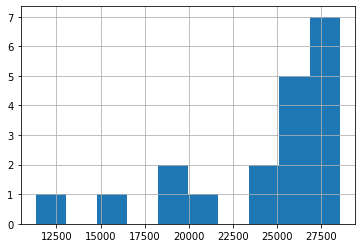

In [67]:
amt_annuity_older_50.hist()

###03) Existe uma correlação forte entre ter imóvel próprio e ter carro próprio? Por que?

In [69]:
# Verificando se há correlação entre ter imóvel próprio e carro próprio

#df_credit['FLAG_OWN_REALTY'] = pd.to_numeric(df_credit['FLAG_OWN_REALTY'].apply(lambda x:'1' if x=="Y" else '0'))

df_credit[df_credit['FLAG_OWN_REALTY']=="Y"]

#df_credit[df_credit['FLAG_OWN_CAR']=="Y"] = 1

#df_credit[df_credit['FLAG_OWN_REALTY']=='1']
#df_credit['FLAG_OWN_REALTY']

#own_realty[['FLAG_OWN_REALTY','FLAG_OWN_CAR']]
# Não existe correlação 
df_credit['FLAG_OWN_CAR'].isnull().sum()

0

In [53]:
#survey_df['language'].replace(to_replace = 'Java', value= 'Go')
#df['price'] = pd.to_numeric(df['price'].apply(lambda x: str(x).replace('$','').replace(',','')))
#df_credit['FLAG_OWN_REALTY'].replace("Y", 1)
df_credit['FLAG_OWN_REALTY']


0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: FLAG_OWN_REALTY, Length: 100000, dtype: int64

In [187]:
df_teste = df_credit['FLAG_OWN_REALTY'].replace(to_replace='Y', value='1')

In [193]:
df_teste.isna().sum()

0

In [25]:
flag_realty = df_credit['FLAG_OWN_REALTY']
a = flag_realty.replace('Y', '1')
print(a)

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: FLAG_OWN_REALTY, Length: 100000, dtype: object


In [173]:
df_credit[df_credit['FLAG_OWN_REALTY']=='1'].count()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
OWN_CAR_AGE                   0
FLAG_WORK_PHONE               0
FLAG_CONT_MOBILE              0
FLAG_EMAIL                    0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
REGION_RATING_CLIENT          0
WEEKDAY_APPR_PROCESS_START    0
HOUR_APPR_PROCESS_START       0
ORGANIZATION_TYPE             0
HOUSETYPE_MODE                0
WALLSMATERIAL_MODE            0
EMERGENCYSTATE_MODE           0
DAYS_LAST_PHONE_CHANGE        0
AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_

In [112]:
df_credit[df_credit['FLAG_OWN_CAR']=="Y"]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,old
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,NaN,NaN,-1562.0,0.0,0.0,0.0,1.0,1.0,2.0,37
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,NaN,NaN,-1070.0,0.0,0.0,0.0,0.0,0.0,0.0,51
13,100017,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,...,Panel,No,-4.0,0.0,0.0,0.0,0.0,0.0,1.0,38
15,100019,0,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,...,NaN,NaN,-925.0,0.0,0.0,0.0,0.0,0.0,1.0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,216082,0,Cash loans,M,Y,N,2,270000.0,450000.0,24894.0,...,"Stone, brick",No,-928.0,0.0,0.0,0.0,0.0,2.0,0.0,37
99994,216085,0,Cash loans,M,Y,N,0,225000.0,612000.0,26059.5,...,NaN,NaN,-1792.0,NaN,NaN,NaN,NaN,NaN,NaN,45
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,37044.0,...,Panel,No,-2893.0,0.0,0.0,0.0,0.0,0.0,3.0,48
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,6579.0,...,"Stone, brick",No,-3105.0,0.0,0.0,0.0,0.0,0.0,4.0,34


In [137]:
data_null = pd.isnull(df_credit['AMT_ANNUITY'])
df_credit[data_null]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,old
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,"Stone, brick",No,-2.0,0.0,0.0,0.0,0.0,1.0,1.0,29
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,...,NaN,NaN,-706.0,0.0,0.0,0.0,1.0,0.0,1.0,24
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,...,NaN,NaN,-199.0,0.0,0.0,0.0,1.0,0.0,1.0,47
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,...,NaN,NaN,-2841.0,0.0,0.0,0.0,1.0,0.0,4.0,31
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,...,"Stone, brick",No,-743.0,0.0,0.0,1.0,0.0,0.0,6.0,54
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,...,Panel,No,-1986.0,0.0,0.0,0.0,0.0,0.0,11.0,57
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,...,Panel,No,-348.0,0.0,0.0,0.0,2.0,0.0,0.0,33
